<a href="https://colab.research.google.com/github/zanmol/Zadeanmol/blob/main/Healthcare_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
hd = pd.read_csv('/content/healthcare_dataset.csv')

In [4]:
hd.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
hd.shape

(55500, 15)

In [6]:
hd.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [7]:
hd.duplicated().sum()

534

In [8]:
hd.drop_duplicates(inplace=True)

In [9]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB



# Datatype Conversion

In [10]:
hd['Discharge Date'] = pd.to_datetime(hd['Discharge Date'])
hd['Date of Admission'] = pd.to_datetime(hd['Date of Admission'])

In [11]:
hd.dtypes

,0
Name,object
Age,int64
Gender,object
Blood Type,object
Medical Condition,object
Date of Admission,datetime64[ns]
Doctor,object
Hospital,object
Insurance Provider,object
Billing Amount,float64


In [12]:
hd.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# EDA

<Axes: xlabel='Gender'>

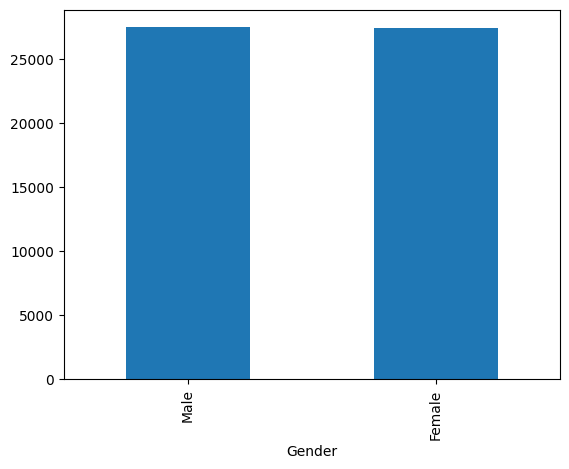

In [ ]:
hd['Gender'].value_counts().plot(kind='bar')

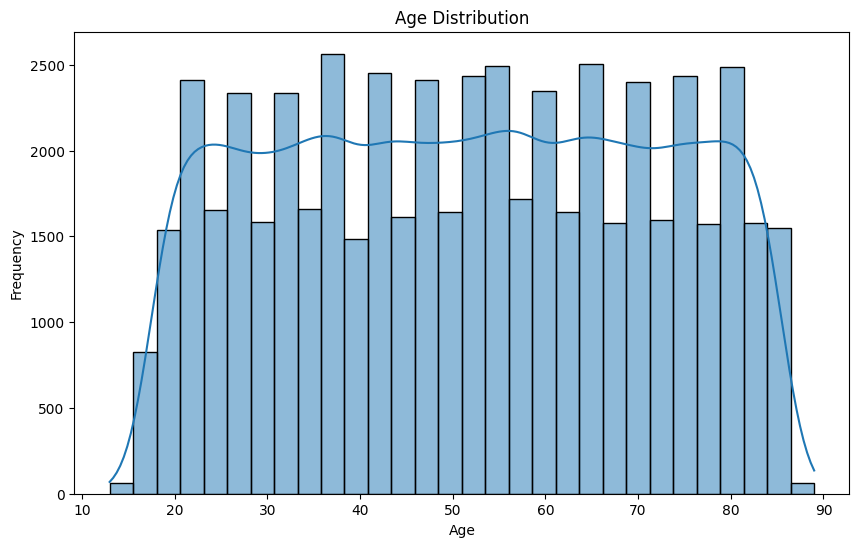

In [14]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(hd['Age'], bins = 30, kde = True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

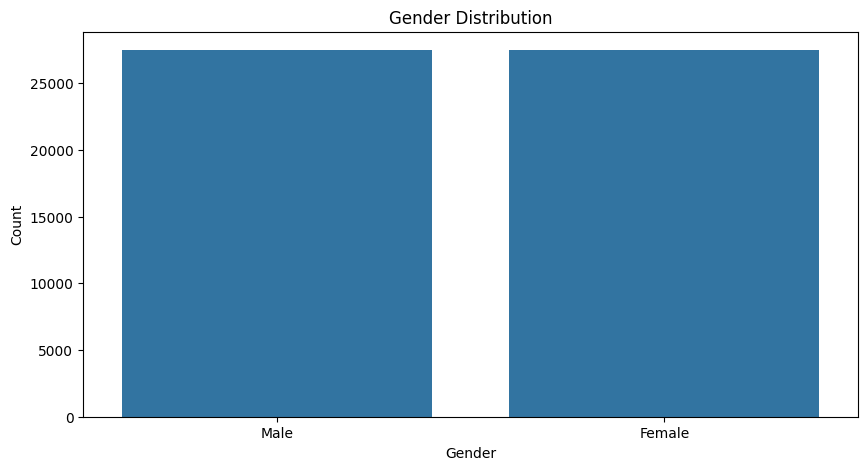

In [16]:
# Gender distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=hd)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

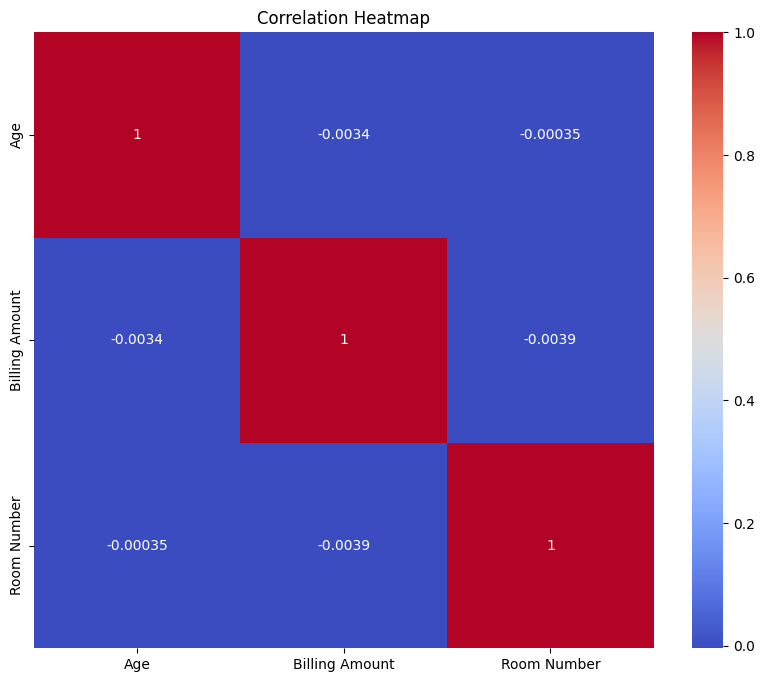

In [17]:
# Correlation heatmap for numeric value
numeric_hd = hd.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_hd.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Predective Modelling
Given the data, it might be interesting to predict the type of addmission based on other features. Lets build a predictive model for this purpose.

In [19]:
# Prepare the data for modelling
X = hd[['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Billing Amount', 'Insurance Provider']]
y = hd['Admission Type']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first = True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializa and train the model
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.4084045843187193,
 array([[1499, 1066, 1100],
        [1092, 1471, 1128],
        [1083, 1035, 1520]]),
 '              precision    recall  f1-score   support\n\n    Elective       0.41      0.41      0.41      3665\n   Emergency       0.41      0.40      0.41      3691\n      Urgent       0.41      0.42      0.41      3638\n\n    accuracy                           0.41     10994\n   macro avg       0.41      0.41      0.41     10994\nweighted avg       0.41      0.41      0.41     10994\n')

# In this notebook, we explored a healthcare dataset, performed some EDA, and built a predictive model for admission type. The model's accuracy and other metrics provide a good starting point, but there's always room for improvement.